### Evaluation Metrics
##### Evaluation metrics deals with assessing the predicted response against the actual value
##### Evaluation metrics gives us a single number which indicates how good the model is performing

### Data Acquisition,Wrangling and model training steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [7]:
#change totalcharges to numeric type,ignore all non-digit characters
df.totalcharges  = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
#fill the null values with 0
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [9]:
#turn the churn values into numeric values
df.churn = (df.churn == 'yes').astype(int)

In [10]:
# 60% for training, 20% for validation and 20% for testing
#df is split into 80% for training and 20% for testing 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [11]:
len(df_full_train), len(df_test)

(5634, 1409)

In [12]:
#split df_full_train into df_val(validation data)
#test size =0.25 because the df_full_train df is 80% of the original df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [13]:
len(df), len(df_train), len(df_test), len(df_val)

(7043, 4225, 1409, 1409)

In [14]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
#split the churn column from the rest of the dataframe
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [16]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [17]:
#check for missing values
df_full_train = df_full_train.reset_index(drop=True)

In [18]:
numerical = ['tenure','monthlycharges','totalcharges']

In [19]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [20]:
#avoid creating sparse matrix
dv = DictVectorizer(sparse= False)

In [21]:
#turn categorical and numerical varaibles into dicts
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [22]:
# convert the dicts into vector format
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [23]:
model = LogisticRegression(max_iter=len(X_train))

In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=4225)

In [25]:
#for validation data 
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

In [26]:
X_val = dv.fit_transform(val_dict)

In [27]:
y_pred = model.predict_proba(X_val)[:, 1]

In [28]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [29]:
model_acc = (y_val == churn_decision).mean()
print("Accuracy of model is %.3f" %model_acc)

Accuracy of model is 0.803


### Accuracy and Dummy model
###### we used an classification threshold(decision threshold) value of 0.5(meaning customers with predicted value of 0.5 or higher are considered as churning)

In [30]:
#try different threshold values between 0 and 1
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [31]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    model_acc = (y_val == churn_decision).mean()
    scores.append(model_acc)
    print("For threshold %.2f accuracy of model is %.3f" %(t,model_acc))

For threshold 0.00 accuracy of model is 0.274
For threshold 0.05 accuracy of model is 0.510
For threshold 0.10 accuracy of model is 0.605
For threshold 0.15 accuracy of model is 0.665
For threshold 0.20 accuracy of model is 0.710
For threshold 0.25 accuracy of model is 0.737
For threshold 0.30 accuracy of model is 0.757
For threshold 0.35 accuracy of model is 0.767
For threshold 0.40 accuracy of model is 0.782
For threshold 0.45 accuracy of model is 0.795
For threshold 0.50 accuracy of model is 0.803
For threshold 0.55 accuracy of model is 0.801
For threshold 0.60 accuracy of model is 0.798
For threshold 0.65 accuracy of model is 0.787
For threshold 0.70 accuracy of model is 0.763
For threshold 0.75 accuracy of model is 0.742
For threshold 0.80 accuracy of model is 0.730
For threshold 0.85 accuracy of model is 0.726
For threshold 0.90 accuracy of model is 0.726
For threshold 0.95 accuracy of model is 0.726
For threshold 1.00 accuracy of model is 0.726


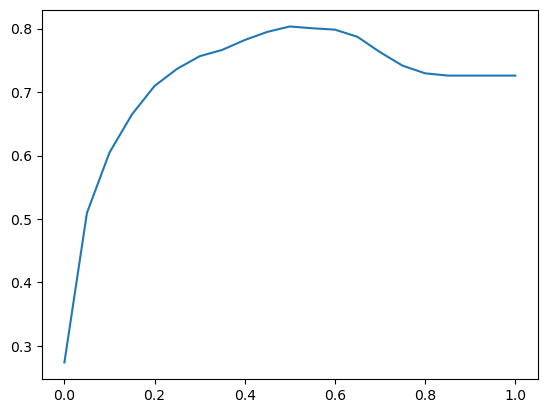

In [32]:
plt.plot(thresholds, scores)

In [33]:
#using accuracy_score function from sklearn
from sklearn.metrics import accuracy_score

In [34]:
#accuracy_score(actual val, predicted val)
#replace churn_decision with y_pred >= 0.5 for better result
acc_score = accuracy_score(y_val, churn_decision)
acc_score

0.7260468417317246

In [35]:
#replace churn_decision with y_pred >= 0.5 for better result
acc_score = accuracy_score(y_val,y_pred >= 0.5 )

In [36]:
acc_score

0.8034066713981547

In [37]:
#checking dummy model for baseline(classification threshold == 1.0)
# when y_pred >= 1.0 -> means no customer is churning
acc_baseline = accuracy_score(y_val, y_pred >= 1.0)
acc_baseline

0.7260468417317246

In [38]:
#count the number of predicted values greater than 1.0
from collections import Counter

In [39]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [40]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [41]:
y_val.mean()

0.2739531582682754

In [42]:
1 - y_val.mean()

0.7260468417317246

### Insight
##### From the above evaluation we can see that accuracy doesn't necessarily indicate how good a model performs 
#### Since in the above dataset we deal with class imbalance(one class has more samples than the other/s)
#### Accuracy doesn't differentiate between errors (false negative and false postive for eg)
##### Differentiating between errors is important because some errors are more costly than the others.

### Confusion Matrix (Confusion Table)
##### Arrange different types of error and accurate outputs in a tabular format
##### True Negative(succefully predicted not to churn values), False Negative(predicted not to churn but churned)
##### True Positive(succefully predicted churn values) , False Positive(predicted to churn but didn't)

In [43]:
actual_pos = (y_val == 1)
actual_neg = (y_val == 0)


In [44]:
actual_pos

array([False, False, False, ..., False,  True,  True])

In [45]:
actual_neg

array([ True,  True,  True, ...,  True, False, False])

In [46]:
# use 0.5 as threshold
t = 0.5
pred_pos = (y_pred >= t)
pred_neg = (y_pred < t)

In [47]:
pred_pos

array([False, False, False, ..., False,  True,  True])

In [48]:
pred_neg

array([ True,  True,  True, ...,  True, False, False])

In [49]:
true_pos = (pred_pos & actual_pos).sum()
true_neg = (pred_neg & actual_neg).sum()

In [50]:
true_pos, true_neg

(213, 919)

In [51]:
false_pos = (pred_pos & actual_neg).sum()
false_neg = (pred_neg & actual_pos).sum()

In [52]:
false_pos, false_neg

(104, 173)

##### We see that we've successfully predicted 65% true_neg(not churn) and 15 true_pos(churn)
##### But there is an error; the false_pos, unsuccessfully predicted to churn but didn't will receive our promotional email (wrong targets)
##### While the true_neg (targeted customers), unsuccessfully predicted to not churn but did will not the receive the promotional emails 

In [53]:
#confusion matrix
confusion_matrix = np.array([
    [true_neg, false_pos],
    [false_neg, true_pos]
])

In [54]:
confusion_matrix

array([[919, 104],
       [173, 213]])

In [55]:
#normalizing the confusion matrix(writing it in relative numbers)
(confusion_matrix / confusion_matrix.sum()).round(3)

array([[0.652, 0.074],
       [0.123, 0.151]])

### Precision and Recall
##### Precision deals with the fraction of true_pos values over the total number of positive values
##### Precision = true_pos / (true_pos + false_pos)
##### Recall deals with the fraction of true_pos values over the total observation of target value
##### Recall  = true_pos / (true_pos + false_neg)

In [56]:
true_pos + false_pos

317

In [57]:
precision = true_pos / (true_pos + false_pos)
precision

0.6719242902208202

##### 33% of the users that wiil receive the promotional email are not the target audience (loss of resources)

In [58]:
(true_pos + false_neg)

386

In [59]:
recall = true_pos / (true_pos + false_neg)
recall

0.5518134715025906

##### 45% of the users that were supposed to receive the promotional email will not receive it (loss of targeted customers)

##### The Precision and Recall show us that accuracy is misleading 

### ROC CURVES
###### Receiver Operating Characteristic curve, is a graph that shows the performance of a classification model at different classification thresholds
###### we calcualte the False Postive Rate(fpr) and True Negative Rate(tpr)
##### fpr = false_pos / (false_pos + true_neg). In our model fpr deals with all the customers that didn't churn
##### tpr = true_pos / (true_pos + false_neg). In our model tpr deals with all the customers that did churn

In [60]:
#true postive rate
tpr = true_pos / (true_pos + false_neg)
tpr

0.5518134715025906

In [61]:
#tpr has the same value as recall
recall

0.5518134715025906

In [62]:
fpr= false_pos / (true_neg + false_pos)
fpr

0.10166177908113393

In [63]:
#check tpr and fpr for different thresholds
thresholds = np.linspace(0,1, 101)
scores = []
for t in thresholds:
    actual_pos = (y_val == 1)
    actual_neg = (y_val == 0)
    pred_pos = (y_pred >= t)
    pred_neg = (y_pred < t)
    tp = (pred_pos & actual_pos).sum()
    tn = (pred_neg & actual_neg).sum()
    fp = (pred_pos & actual_neg).sum()
    fn = (pred_neg & actual_pos).sum()
    
    scores.append((t, tp, tn, fp, fn))


In [64]:
columns = ['thresholds', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns = columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
df_scores[:: 10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,368,484,539,18,0.953368,0.526882
20,0.2,337,663,360,49,0.873057,0.351906
30,0.3,288,778,245,98,0.746114,0.239492
40,0.4,251,851,172,135,0.650259,0.168133
50,0.5,213,919,104,173,0.551813,0.101662
60,0.6,154,971,52,232,0.398964,0.050831
70,0.7,69,1006,17,317,0.178756,0.016618
80,0.8,5,1023,0,381,0.012953,0.000000
90,0.9,0,1023,0,386,0.000000,0.000000


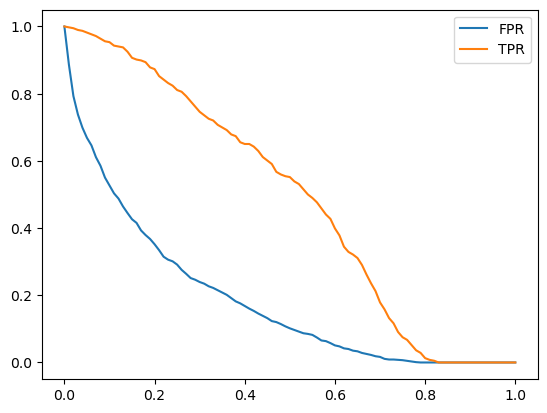

In [65]:
#plot the fpr and tpr of df_scores
plt.plot(thresholds, df_scores['fpr'], label='FPR')
plt.plot(thresholds, df_scores['tpr'], label='TPR')
plt.legend()

### Random Model
##### This model will be used as baseline to compare the model

In [66]:
np.random.seed(42)
y_rand = np.random.uniform(0,1, size = len(y_val))

In [67]:
((y_rand >= 0.5) == y_val).mean()

0.511000709723208

In [68]:
#function to evaluate tpr, fpr for different thresholds
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0,1, 101)
    scores = []
    for t in thresholds:
        actual_pos = (y_val == 1)
        actual_neg = (y_val == 0)
        pred_pos = (y_pred >= t)
        pred_neg = (y_pred < t)
        tp = (pred_pos & actual_pos).sum()
        tn = (pred_neg & actual_neg).sum()
        fp = (pred_pos & actual_neg).sum()
        fn = (pred_neg & actual_pos).sum()
        scores.append((t, tp, tn, fp, fn))
        
    columns = ['thresholds', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns = columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
    
    return df_scores


In [69]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,354,119,904,32,0.917098,0.883675
20,0.2,313,233,790,73,0.810881,0.772239
30,0.3,268,325,698,118,0.694301,0.682307
40,0.4,236,426,597,150,0.611399,0.583578
50,0.5,204,516,507,182,0.528497,0.495601
60,0.6,158,610,413,228,0.409326,0.403715
70,0.7,116,715,308,270,0.300518,0.301075
80,0.8,74,806,217,312,0.191710,0.212121
90,0.9,38,918,105,348,0.098446,0.102639


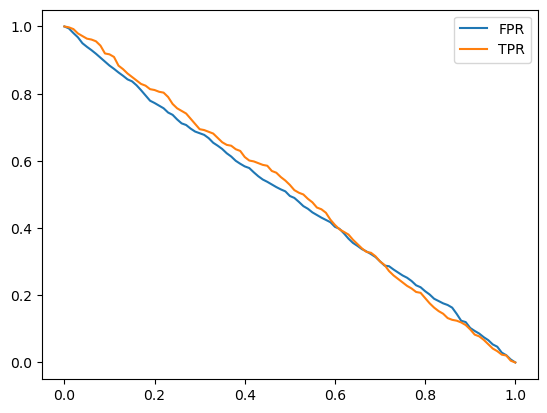

In [70]:
#plot the fpr and tpr of df_rand
plt.plot(thresholds, df_rand['fpr'], label='FPR')
plt.plot(thresholds, df_rand['tpr'], label='TPR')
plt.legend()

### Ideal Model
##### This model will be the benchmark for our model

In [71]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(1023, 386)

In [72]:
#create an ideal array(1023 1 values and 386 0 values)
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [73]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [74]:
#find the threshold inorder to find the perfect value
1 - y_val.mean()

0.7260468417317246

In [75]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [76]:
#check the tpr, fpr of ideal model
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal

,thresholds,tp,tn,fp,fn,tpr,fpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,386,15,1008,0,1.000000,0.985337
2,0.02,386,29,994,0,1.000000,0.971652
3,0.03,386,43,980,0,1.000000,0.957967
4,0.04,386,57,966,0,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,1023,0,329,0.147668,0.000000
97,0.97,43,1023,0,343,0.111399,0.000000
98,0.98,29,1023,0,357,0.075130,0.000000
99,0.99,15,1023,0,371,0.038860,0.000000


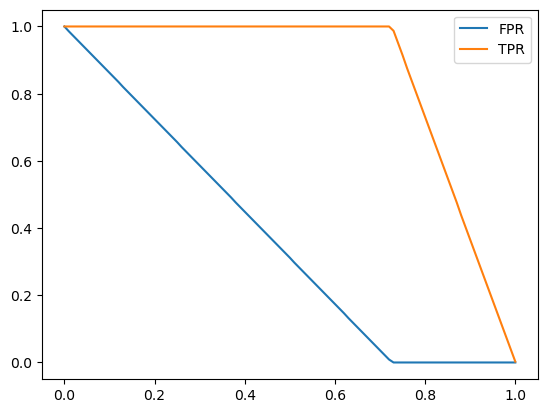

In [77]:
#plot the fpr and tpr of df_ideal
plt.plot(thresholds, df_ideal['fpr'], label='FPR')
plt.plot(thresholds, df_ideal['tpr'], label='TPR')
plt.legend()

### Put everything together

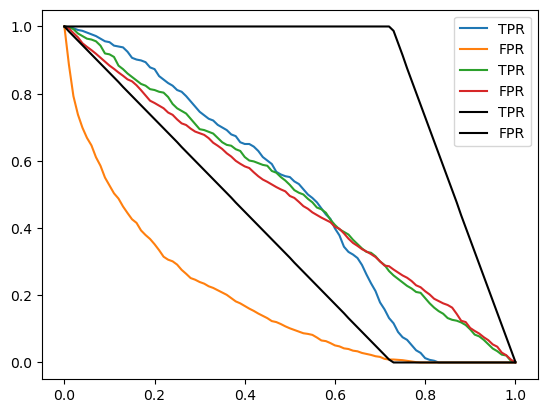

In [78]:
#plot the fpr and tpr of all three models
plt.plot(thresholds, df_scores['tpr'], label='TPR')
plt.plot(thresholds, df_scores['fpr'], label='FPR')

plt.plot(thresholds, df_rand['tpr'], label='TPR')
plt.plot(thresholds, df_rand['fpr'], label='FPR')

plt.plot(thresholds, df_ideal['tpr'], label='TPR', color='black')
plt.plot(thresholds, df_ideal['fpr'], label='FPR', color='black')
plt.legend()

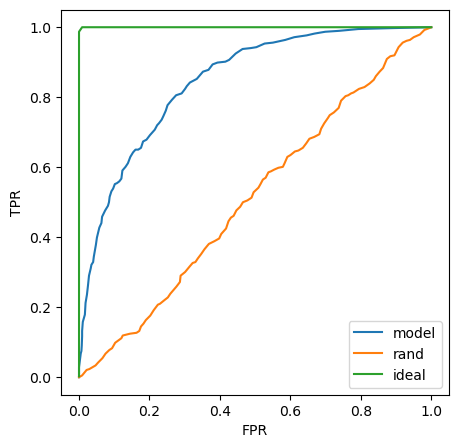

In [79]:
#plot only the fpr and tpr of the three models
plt.figure(figsize=(5,5))
plt.plot(df_scores['fpr'],df_scores['tpr'], label='model')
plt.plot(df_rand['fpr'],df_rand['tpr'], label='rand')
plt.plot(df_ideal['fpr'],df_ideal['tpr'], label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

##### We want the ROC curve of our model to be closer to the ideal model ROC curve(north star) and far away from the random curve
##### the ROC curve of our model should never be below the random model ROC curve

### ROC using scikit-learn

In [80]:
from sklearn.metrics import roc_curve

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

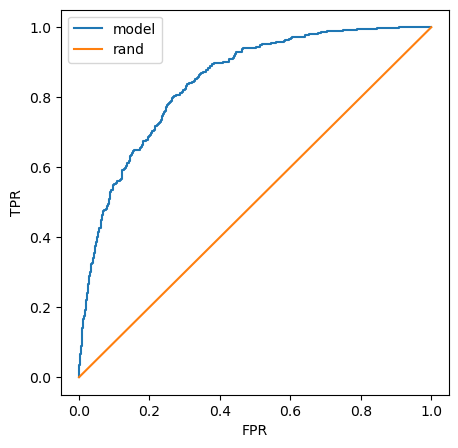

In [82]:
#we just use [0,1], [0,1] as random model fpr and tpr values
plt.figure(figsize=(5,5))

plt.plot(fpr,tpr, label='model')
plt.plot([0,1],[0, 1], label='rand')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### ROC AUC (Area Under the Curve)

In [83]:
from sklearn.metrics import auc

In [84]:
auc(fpr, tpr)

0.845415546067393

In [85]:
auc(df_scores.fpr, df_scores.tpr)

0.8456206727141041

In [86]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [87]:
auc(df_rand.fpr, df_rand.tpr)

0.5121303288610661

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_val, y_pred)

0.845415546067393

##### the above auc indicates the probability of randomly selected customer would churn or not

In [90]:
neg = y_pred[y_val== 0]
pos = y_pred[y_val== 1]

In [91]:
#check if a randomly chosen customer will churn or not
n = 10000
seed = 1
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)

In [92]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.8445

###### AUC is a good metric to evaluate our model

### Cross-Validation
##### Evaluate our model with different subsets of data
##### Getting the average prediction and the spread within the prediction

In [126]:
#function for training
#add regularization variable C
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C,max_iter=len(y_train))
    model.fit(X_train, y_train)
    return dv, model

In [111]:
dv, model = train(df_train, y_train)

In [112]:
#function for the prediction 
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    pred = model.predict_proba(X)[:, 1]
    
    return pred

In [113]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.00805644, 0.20750001, 0.22164024, ..., 0.15171674, 0.77658723,
       0.80980427])

In [117]:
#performing the KFOLD cross validation
#import the package from scikit-learn
from sklearn.model_selection import KFold

In [118]:
kfold = KFold(n_splits=10, shuffle=True , random_state=1)

In [123]:
#split the training dataset, loop through it and assign it to indexes
#shuffles the dataset 10 times
#perform the above steps
for C in [0,0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv,model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('%s %.3f +.. %.2f'%(C, np.mean(scores), np.std(scores)))

0 0.841 +.. 0.01
0.001 0.841 +.. 0.01
0.01 0.841 +.. 0.01
0.1 0.841 +.. 0.01
0.5 0.841 +.. 0.01
1 0.841 +.. 0.01
5 0.841 +.. 0.01
10 0.841 +.. 0.01


In [127]:
#performing the cross validation on full training dataset and test dataset, use C=1.0 
dv,model = train(df_full_train, df_full_train.churn.values,1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259